# Regression in torch

In [1]:
import torch
import torch.nn as nn 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [4]:
samples = 1000
dims  = 2
X , y = make_regression(n_samples=samples, n_features=dims, noise=10, random_state=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) 
y_test = y_test.view(y_test.shape[0], 1)

X_train.shape, y_train.shape , X_test.shape, y_test.shape
X_train.dtype , y_train.dtype
X_train[:5], y_train[:5]

(torch.Size([670, 2]),
 torch.Size([670, 1]),
 torch.Size([330, 2]),
 torch.Size([330, 1]))

(torch.float32, torch.float32)

(tensor([[-0.0133, -0.6167],
         [-0.5397,  1.4429],
         [ 0.5377, -0.3485],
         [-0.5720, -0.3416],
         [-0.2966,  0.2488]]),
 tensor([[-40.0575],
         [122.9814],
         [-17.9709],
         [-45.9810],
         [ 29.1849]]))

In [5]:
samples, dims = X_train.shape
input_size = dims
output_size = 1
learning_rate = 0.01
epochs = 1000

model = nn.Linear(input_size, output_size)

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
for i in range(epochs + 1):
    # forward 
    y_pred = model(X_train)

    # loss
    loss = criterion(y_pred, y_train)

    # backward
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    if i % (epochs/10) == 0:
        print(f'epoch {i:5d} loss {loss.item():.5f}')

epoch     0 loss 7991.50684
epoch   100 loss 239.23923
epoch   200 loss 95.17429
epoch   300 loss 92.32184
epoch   400 loss 92.26221
epoch   500 loss 92.26090
epoch   600 loss 92.26087
epoch   700 loss 92.26089
epoch   800 loss 92.26088
epoch   900 loss 92.26088
epoch  1000 loss 92.26088


In [8]:
y_pred = model(X_test)
loss = criterion(y_pred, y_test)
print(f'Test loss {loss.item():.5f}')

Test loss 99.52586


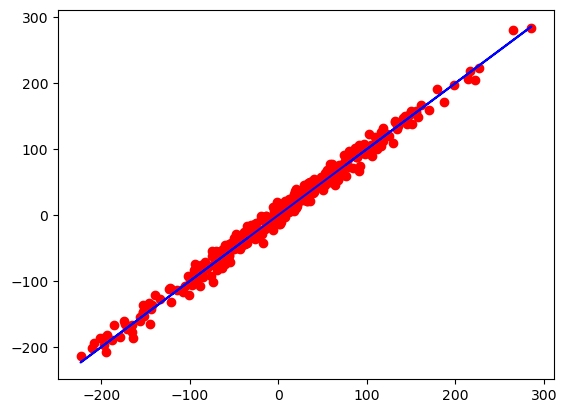

In [9]:
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()
plt.plot(y_test, y_pred, 'ro')
plt.plot(y_test, y_test, 'b')